In [4]:
using JLD, PyPlot

In [5]:
archivo="/home/karel/RGutWork/JLDFiles/Enriquecidas/Deshinibidas/evento_desinhibido_2.jld"

"/home/karel/RGutWork/JLDFiles/Enriquecidas/Deshinibidas/evento_desinhibido_2.jld"

In [6]:
Arxivo=load(archivo)

Dict{String,Any} with 7 entries:
  "Canalesrespuesta" => Set(Array{Int64,1}[[27,62],[36,44],[37,62],[48,50],[51,…
  "KTT_KInv"         => [0.0587544 0.0453965 … 6.84109e-5 8.77293e-5; 0.0487949…
  "kCSDCorrecta"     => [0.0 8.18196 … 1.8844 1.29687; 8.77891 8.96577 … 1.3123…
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "LFPSaturados"     => [-4122.99 14.0991 … 2.01416 0.0; 26.1841 4.02832 … -10.…
  "freq"             => 7.02206
  "CanalesSaturados" => Set(Array{Int64,1}[[31,6],[59,51],[21,59],[50,62],[1,1]…

In [7]:
CSD=Arxivo["kCSDCorrecta"];

In [26]:
(alto,ancho,tmax)=size(CSD)

(64,64,2000)

In [8]:
satu=length(Arxivo["CanalesSaturados"])

5

In [9]:
listonga=(135,139,149)   

(135,139,149)

In [11]:
freq=Arxivo["freq"]
#retrazo=Arxivo["retrazo"]

7.022058198545425

In [14]:
retrazo=0

0

In [15]:
Arxivo["Nota"]

"Usamos las siguientes B y BT para obtener las Ks: BceroDura-r-0.25.dat y BtildeceroDura-r-0.25.dat"

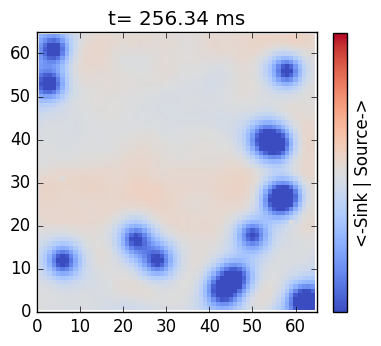

In [24]:
t=1800
ion()
limites=100
figure(figsize=(4,4))
    xlim(0,65)
    ylim(0,65)

    ejemplo=CSD[:,:,t]
    tiempo=round((t-retrazo)/freq,2)
title("t= $tiempo ms")
imagen=imshow((ejemplo), origin="lower", interpolation="none",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
cbx[:set_label]("<-Sink | Source->")

In [31]:
ioff()
limites=200
for t=800:1350
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(0,65)

    ejemplo=CSD[:,:,t]
    tiempo=round((t-retrazo)/freq,1)
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="sinc",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
cbx[:set_label]("<-Sink | Source->")
    savefig("CSD_eventodeshinibido_02_$t.png",dpi=90)
    close(figura)
end
PyPlot.close_figs()